## Data Exploration ##

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Analysis for train data ##

In [5]:
train_data=pd.read_csv("C:/Users/gheva/OneDrive/Desktop/Titanic_train.csv")


In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


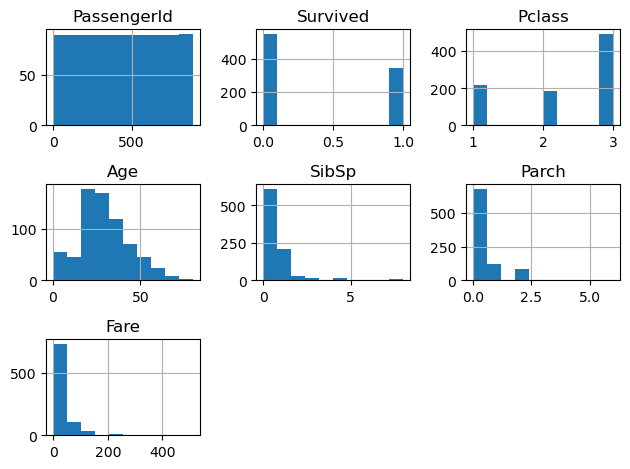

In [19]:
train_data.hist()
plt. tight_layout()

<Axes: >

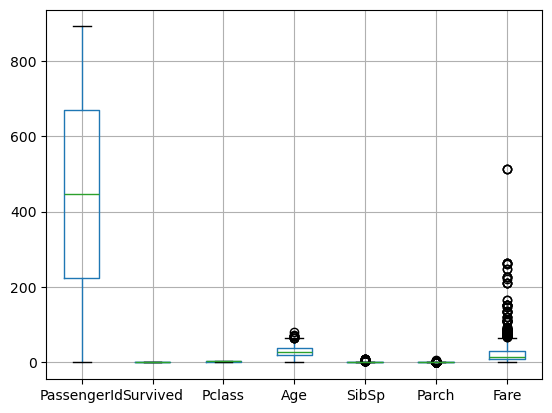

In [21]:
train_data.boxplot()

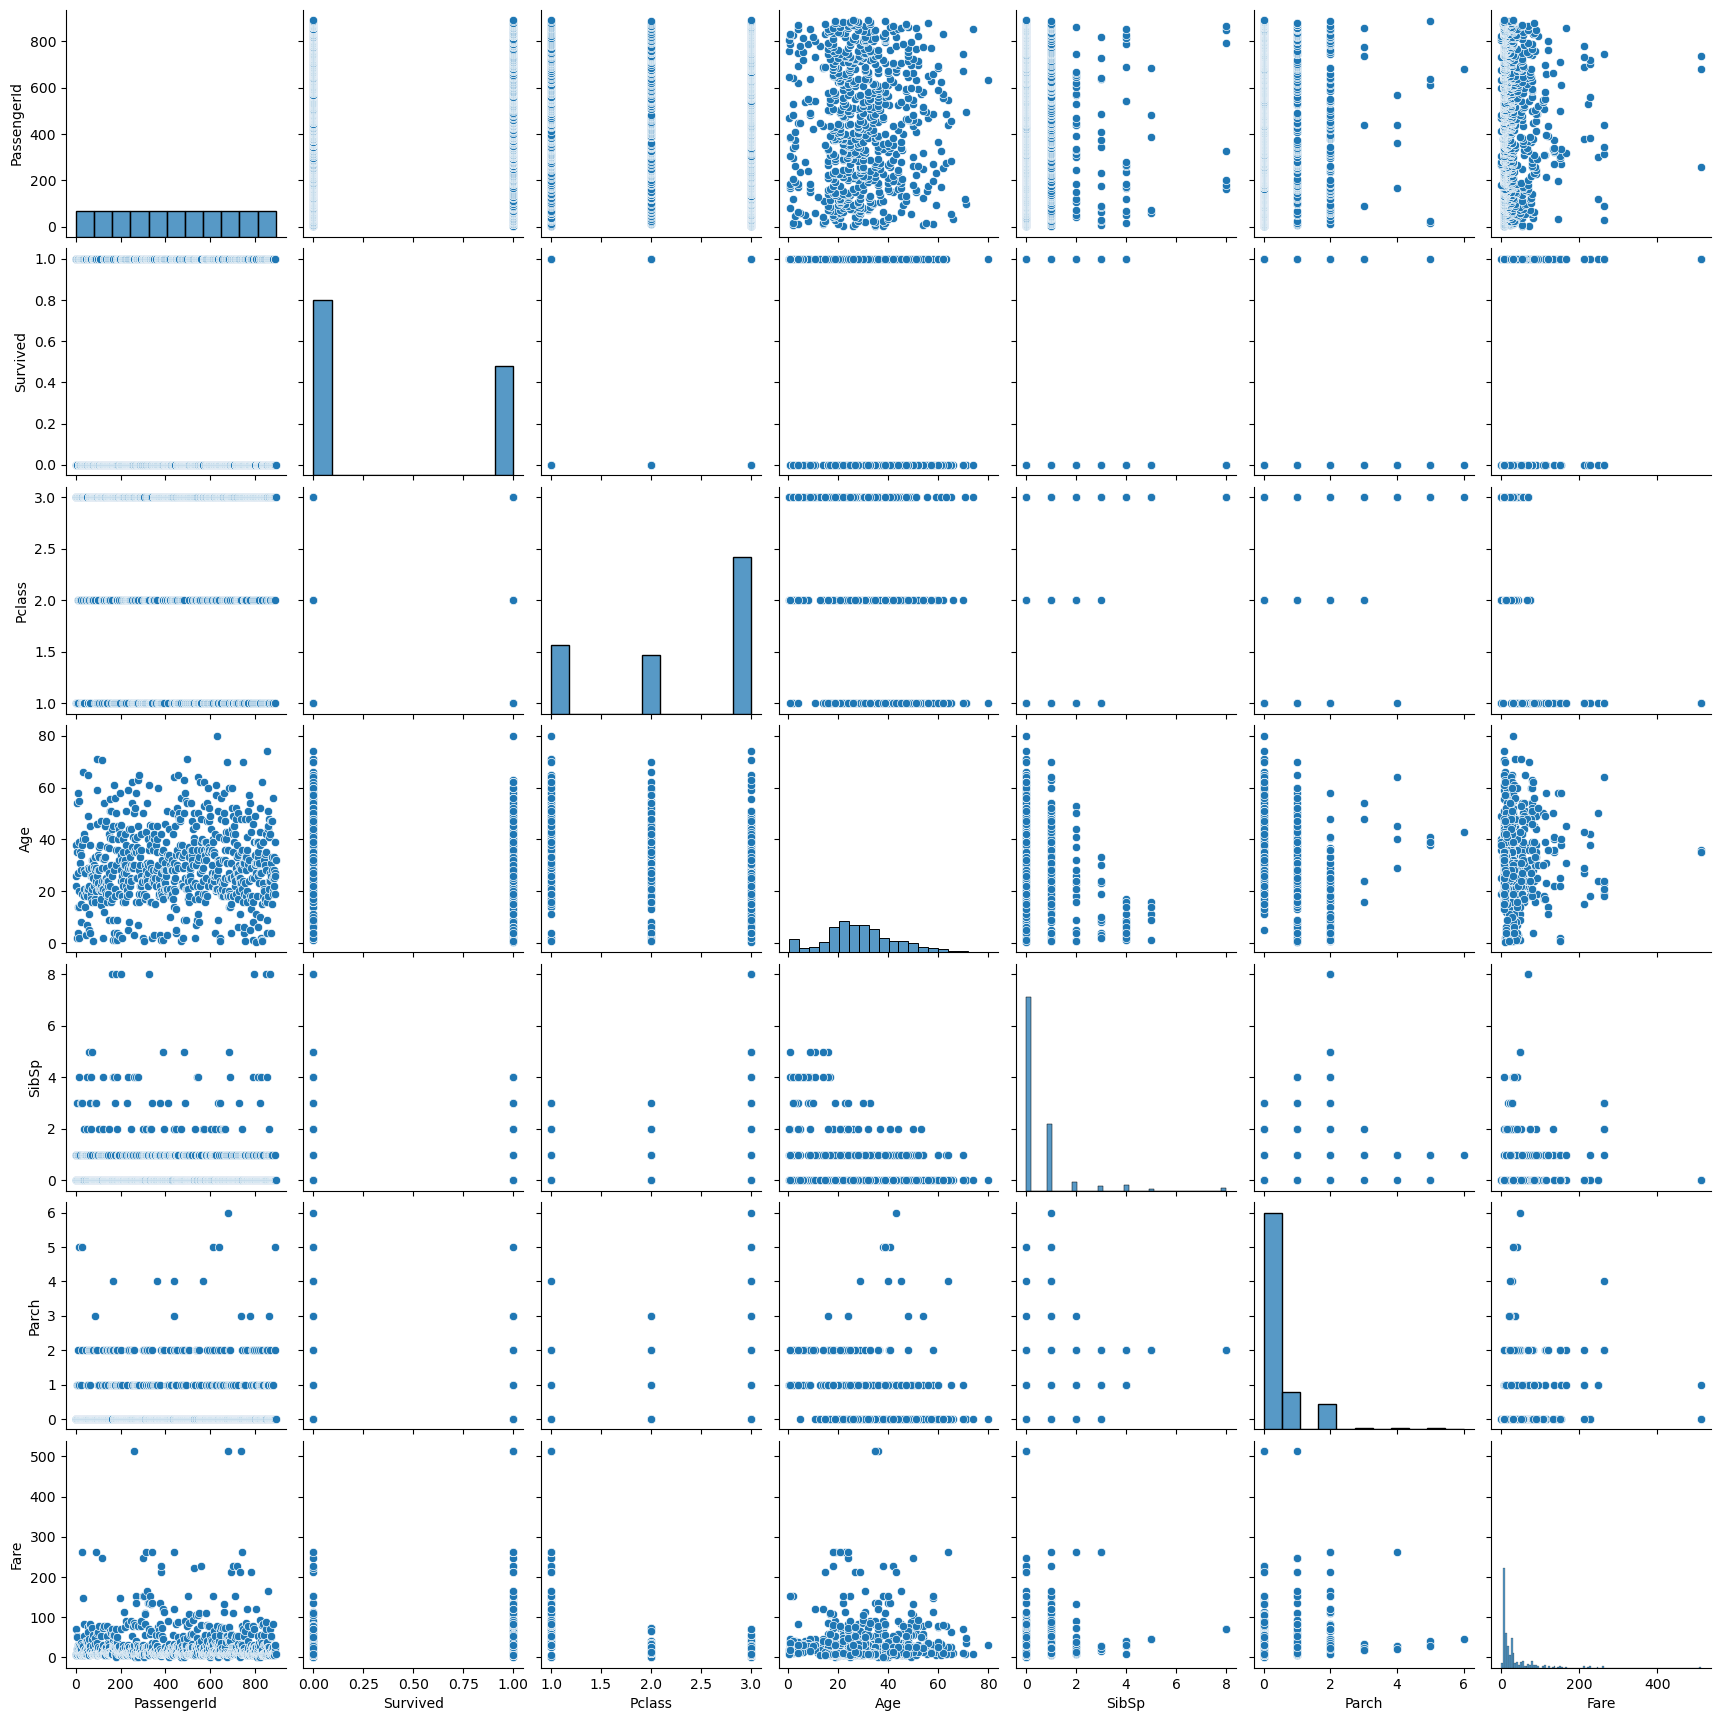

In [25]:
sns.pairplot(train_data)

In [27]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
train_data= pd.get_dummies(data = train_data, columns = ['Embarked'])

In [31]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,True,False,False


## Data Preprocessing ##

In [33]:
train_data.drop(["PassengerId","Name","Sex","Ticket","Cabin"],inplace=True,axis = 1)

In [35]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,NaN,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [37]:
train_data.shape

(891, 9)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


<Axes: xlabel='Age'>

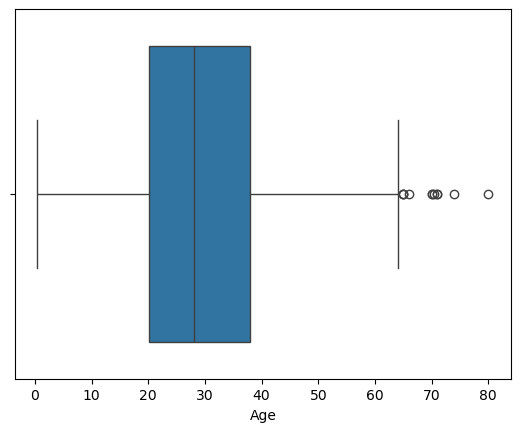

In [41]:
sns.boxplot(x=train_data['Age'])

## The outliers are present in the Age column so we replace the missing values with the median of that column.##

In [43]:
train_data.isna().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

<Axes: >

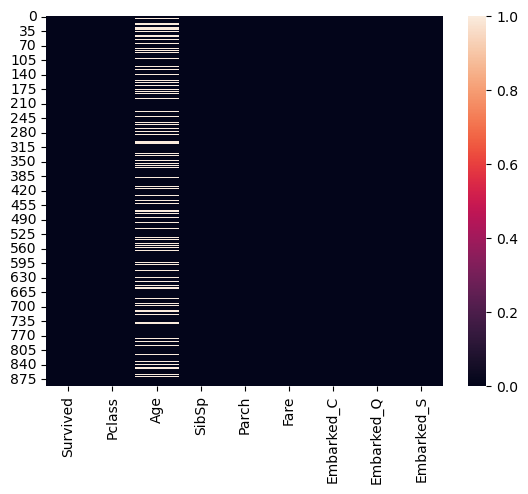

In [45]:
sns.heatmap(train_data.isna())

In [47]:
Age_median = train_data['Age'].median()
Age_median

28.0

In [49]:
train_data['Age'].fillna(Age_median,inplace=True)

In [51]:
train_data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [57]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


## Analysis for test data ##

In [59]:
test_data=pd.read_csv("C:/Users/gheva/OneDrive/Desktop/Titanic_test.csv")

In [61]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [67]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [71]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


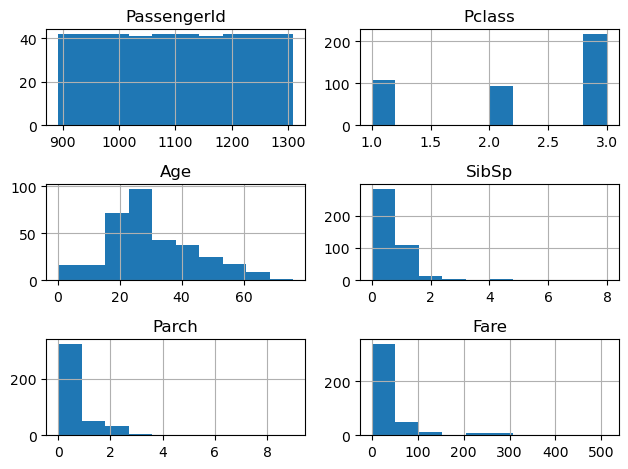

In [73]:
test_data.hist()
plt. tight_layout()

<Axes: >

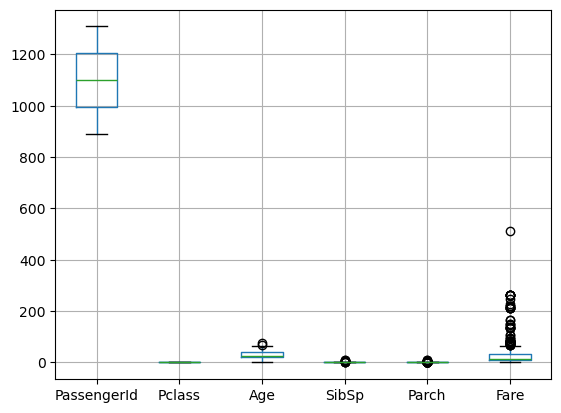

In [75]:
test_data.boxplot()

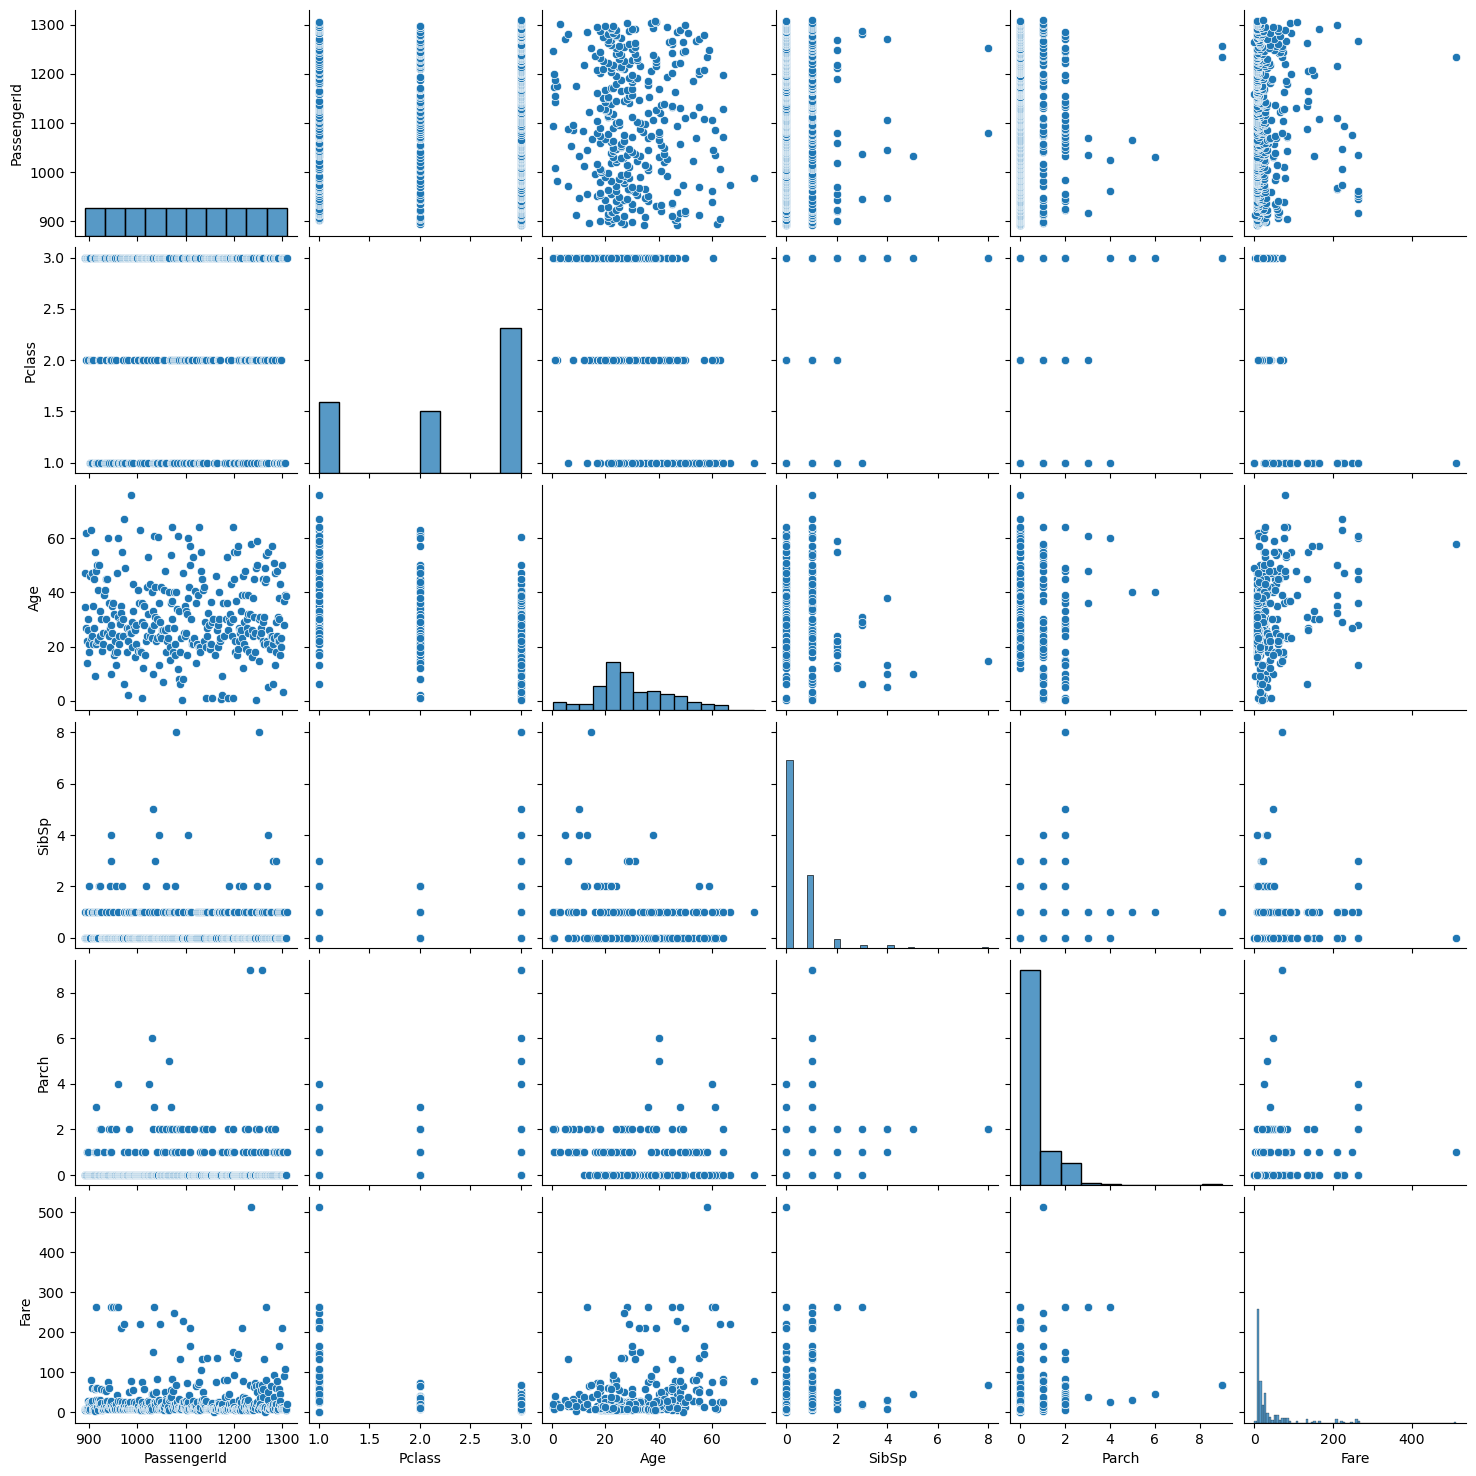

In [77]:
sns.pairplot(test_data)

In [79]:
test_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [81]:
test_data= pd.get_dummies(data = test_data, columns = ['Embarked'])

In [83]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,False,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,True,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,False,True
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,False,False,True


In [85]:
test_data.drop(["PassengerId","Name","Sex","Ticket","Cabin"],inplace=True,axis = 1)

In [87]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,False,True,False
3,3,27.0,0,0,8.6625,False,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,False,False,True
414,1,39.0,0,0,108.9000,True,False,False
415,3,38.5,0,0,7.2500,False,False,True
416,3,NaN,0,0,8.0500,False,False,True


In [89]:
test_data.shape

(418, 8)

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         332 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Embarked_C  418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


<Axes: xlabel='Age'>

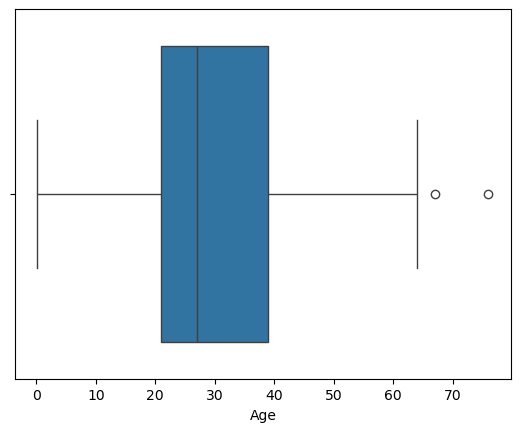

In [93]:
sns.boxplot(x=test_data['Age'])

<Axes: xlabel='Fare'>

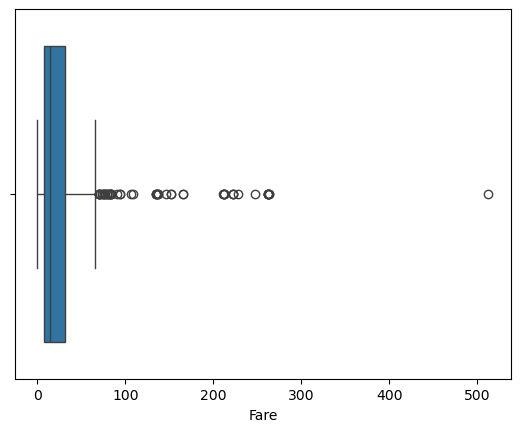

In [95]:
sns.boxplot(x=test_data['Fare'])

The outliers are present in the Age and Fare column so we replace the missing values with median.

In [97]:
test_data.isna().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

<Axes: >

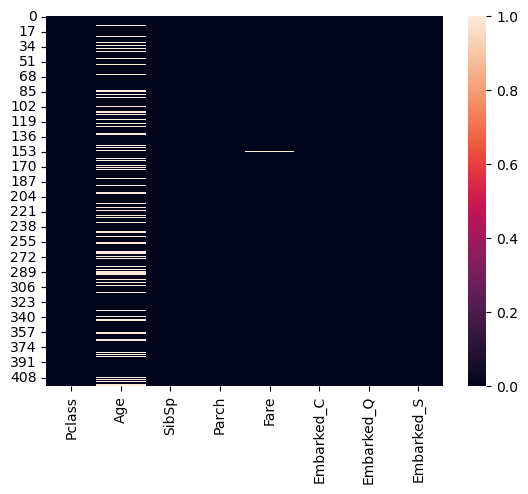

In [99]:
sns.heatmap(test_data.isna())

In [101]:
Age_median = test_data['Age'].median()
Age_median

27.0

In [103]:
test_data['Age'].fillna(Age_median,inplace=True)

In [105]:
Fare_median = test_data['Fare'].median()
Fare_median

14.4542

In [107]:
test_data['Fare'].fillna(Fare_median,inplace=True)

In [109]:
test_data.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Embarked_C  418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


In [113]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,False,True,False
3,3,27.0,0,0,8.6625,False,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,False,False,True
414,1,39.0,0,0,108.9000,True,False,False
415,3,38.5,0,0,7.2500,False,False,True
416,3,27.0,0,0,8.0500,False,False,True


In [ ]:
## Model Building##

In [115]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [117]:
X_train = train_data.iloc[:,1:] 
Y_train = train_data.iloc[:,0]

In [119]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,False,True
1,1,38.0,1,0,71.2833,True,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,False,True
887,1,19.0,0,0,30.0000,False,False,True
888,3,28.0,1,2,23.4500,False,False,True
889,1,26.0,0,0,30.0000,True,False,False


In [121]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [123]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [125]:
print("Model training complete.")

Model training complete.


In [129]:

y_pred = model.predict(X_train)

In [131]:
y_pred 

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [135]:
y_pred_df= pd.DataFrame({'Y': Y_train,
                         'Yhat': model.predict(X_train)})

In [137]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print (confusion_matrix)

[[482  67]
 [186 156]]


In [141]:
## Accuracy##
((482+156)/(482+67+186+156))*100

71.60493827160494

In [159]:
y_train_pred=model.predict(X_train)
y_train_prob=model.predict_proba(X_train)[:,1]


In [187]:
accuracy=accuracy_score(Y_train,y_train_pred)
precision=precision_score(Y_train,y_train_pred)
recall=recall_score(Y_train,y_train_pred)
f1=f1_score(Y_train,y_train_pred)
roc_auc=roc_auc_score(Y_train,y_train_pred)

print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
print(f"f1:{f1:.4f}")
print(f"ROC_auc:{roc_auc:.4f}")

Accuracy:0.7160
Precision:0.6996
Recall:0.4561
f1:0.5522
ROC_auc:0.6671


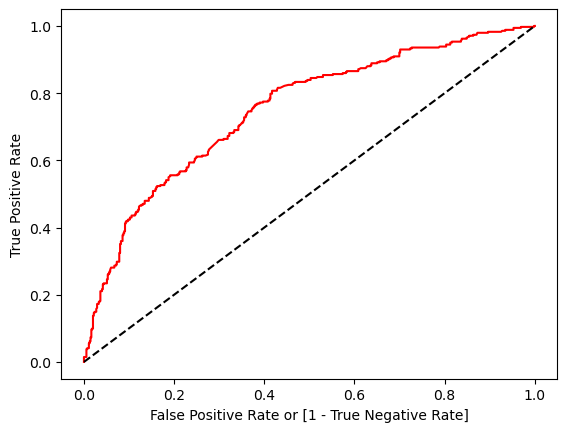

In [199]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## Model Evaluation ##

In [201]:
test_data

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,False,True,False
3,3,27.0,0,0,8.6625,False,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,False,False,True
414,1,39.0,0,0,108.9000,True,False,False
415,3,38.5,0,0,7.2500,False,False,True
416,3,27.0,0,0,8.0500,False,False,True


In [225]:
X_test = test_data.iloc[:,1:] 
Y_test= test_data.iloc[:,0]

In [227]:
X_test

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,False,True,False
1,47.0,1,0,7.0000,False,False,True
2,62.0,0,0,9.6875,False,True,False
3,27.0,0,0,8.6625,False,False,True
4,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...
413,27.0,0,0,8.0500,False,False,True
414,39.0,0,0,108.9000,True,False,False
415,38.5,0,0,7.2500,False,False,True
416,27.0,0,0,8.0500,False,False,True


In [229]:
Y_test

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [233]:
classifier = LogisticRegression()
classifier.fit(X_test,Y_test)

LogisticRegression()

In [235]:
y_pred = classifier.predict(X_test)

In [237]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 3,
       2, 1, 1, 3, 1, 3, 1, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 2,
       3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 1, 2,
       1, 3, 3, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3,

In [239]:
y_pred_df= pd.DataFrame({'Y': Y_test,
                         'Yhat': classifier.predict(X_test)})

In [241]:
y_pred_df

,Y,Yhat
0,3,3
1,3,3
2,2,3
3,3,3
4,3,3
...,...,...
413,3,3
414,1,1
415,3,3
416,3,3


## Interpretations##

In [ ]:
For building the logistic regression model,There is Y variable used is PClass and X Variables is X1 =Age,X2=SibSp, X3= Parch,
X4=Fare,X5=Embarked_C,X6=Embarked_Q,X7=Embarked_S

In [ ]:
   In the Titanic dataset,if "Age" has a negative coefficient , it means older passengers are less likely to survive.
   